## Zeroth Order and DFO Examples

Authors: Antony Sikorski, Jordan Pettyjohn, Hafiz Issah

In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

### Plotting Options: 

Set this to FALSE if you want ALL PLOTS (2D AND 3D) to show up. Set to TRUE if you want ONLY 2D (contour) plots to show up: 

In [2]:
only2d = False

In [3]:
max_iter = 10000

### Rosenbrock Function

We first define the Rosenbrock function, a notoriously difficult function to optimize in two dimensions due to it's long valley with a very small slope:

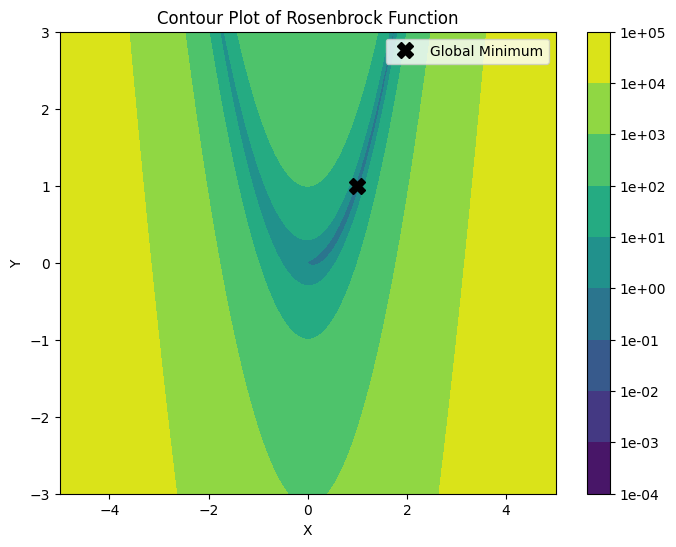

In [4]:
# define Rosenbrock function
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b*(y - x**2)**2

# making grid for plotting
x = np.linspace(-5, 5, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

# plotting contour
fig = plt.figure(figsize=(8, 6))
ax2 = fig.add_subplot(111)
contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm())
plt.colorbar(contour, ax=ax2, format='%.0e')

# adding the global minimum
min_contour = ax2.plot(1, 1, 'X', markersize=12, label='Global Minimum', color='black')

# set titles and labels
ax2.set_title("Contour Plot of Rosenbrock Function")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()
plt.show()

The global minimum is at $(x,y) = (1,1)$. At this point, $f(x,y) = 0$.

We now compute the gradient of the Rosenbrock function, and check the derivative using the derivate checker given to us. 

In [5]:
# true gradient of the Rosenbrock function
def rosenbrock_gradient(x, y, a=1, b=100):
    df_dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    df_dy = 2 * b * (y - x**2)
    return np.array([df_dx, df_dy])

In [6]:
dim = 5

x = np.random.rand(dim) + 10
y = np.random.rand(dim) + 10
v = np.random.rand(dim) + 10

max_iters = 32
h = np.zeros(max_iters)
err0 = np.zeros(max_iters)
err1 = np.zeros(max_iters)

for i in range(max_iters):
  h[i] = 2**(-i) # halve our stepsize every time

  # fv = f(x + h[i]*v)
  fv = rosenbrock(x + h[i]*v, y + h[i]*v)

  T0 = rosenbrock(x, y)

  # T1 = T0 + h[i]*np.matmul(grad_rosenbrock(x, y).transpose(), np.tile(v, (2, 1)))?\
  T1 = T0 + h[i]*np.diag(np.matmul(rosenbrock_gradient(x, y).T, np.tile(v, (2,1))))
  # for matrix output
  # T1 = T0 + h[i]*np.dot(np.ravel(nn_grad_f(W).transpose()), np.ravel(V))
  # T1 = T0 + h[i]*np.dot(np.ravel(nn_grad_f(W)), np.ravel(V))
  # T1 = T0 + h[i]* (nn_grad_f(W).transpose() @ V)
  
  err0[i] = np.linalg.norm(fv - T0) # this error should be linear
  err1[i] = np.linalg.norm(fv - T1) # this error should be quadratic

  # print('h = ', h, ', err0 = ', err0[i], ', err1 = ', err1[i])

  print('h: %.3e, \t err0: %.3e, \t err1: %.3e' % (h[i], err0[i], err1[i]))

h: 1.000e+00, 	 err0: 3.730e+07, 	 err1: 2.787e+07
h: 5.000e-01, 	 err0: 9.885e+06, 	 err1: 5.166e+06
h: 2.500e-01, 	 err0: 3.459e+06, 	 err1: 1.098e+06
h: 1.250e-01, 	 err0: 1.433e+06, 	 err1: 2.523e+05
h: 6.250e-02, 	 err0: 6.508e+05, 	 err1: 6.042e+04
h: 3.125e-02, 	 err0: 3.100e+05, 	 err1: 1.478e+04
h: 1.562e-02, 	 err0: 1.512e+05, 	 err1: 3.656e+03
h: 7.812e-03, 	 err0: 7.471e+04, 	 err1: 9.090e+02
h: 3.906e-03, 	 err0: 3.713e+04, 	 err1: 2.266e+02
h: 1.953e-03, 	 err0: 1.851e+04, 	 err1: 5.658e+01
h: 9.766e-04, 	 err0: 9.239e+03, 	 err1: 1.414e+01
h: 4.883e-04, 	 err0: 4.616e+03, 	 err1: 3.533e+00
h: 2.441e-04, 	 err0: 2.307e+03, 	 err1: 8.830e-01
h: 1.221e-04, 	 err0: 1.153e+03, 	 err1: 2.207e-01
h: 6.104e-05, 	 err0: 5.766e+02, 	 err1: 5.518e-02
h: 3.052e-05, 	 err0: 2.883e+02, 	 err1: 1.379e-02
h: 1.526e-05, 	 err0: 1.441e+02, 	 err1: 3.449e-03
h: 7.629e-06, 	 err0: 7.207e+01, 	 err1: 8.622e-04
h: 3.815e-06, 	 err0: 3.603e+01, 	 err1: 2.155e-04
h: 1.907e-06, 	 err0: 1.802e+01

(array([1.e-14, 1.e-11, 1.e-08, 1.e-05, 1.e-02, 1.e+01, 1.e+04, 1.e+07,
        1.e+10, 1.e+13]),
 [Text(0, 1e-14, '$\\mathdefault{10^{-14}}$'),
  Text(0, 1e-11, '$\\mathdefault{10^{-11}}$'),
  Text(0, 1e-08, '$\\mathdefault{10^{-8}}$'),
  Text(0, 1e-05, '$\\mathdefault{10^{-5}}$'),
  Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 10000.0, '$\\mathdefault{10^{4}}$'),
  Text(0, 10000000.0, '$\\mathdefault{10^{7}}$'),
  Text(0, 10000000000.0, '$\\mathdefault{10^{10}}$'),
  Text(0, 10000000000000.0, '$\\mathdefault{10^{13}}$')])

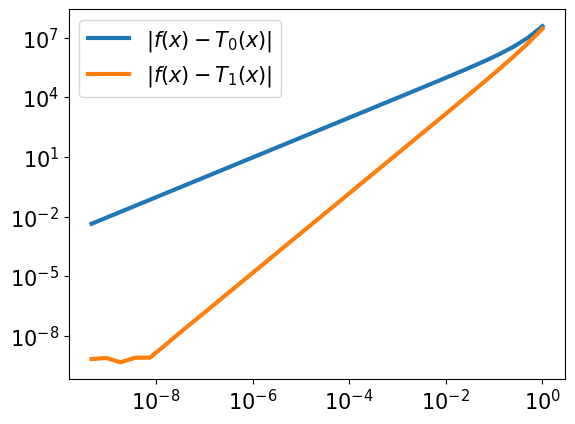

In [7]:
plt.loglog(h, err0, linewidth=3)
plt.loglog(h, err1, linewidth=3)
plt.legend(['$\|f(x) - T_0(x)\|$', '$\|f(x)-T_1(x)\|$'], fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Looks like we got it right. 

### Define the Starting Point for all Methods: 

This should make life easier: 

In [8]:
# this method will break the finite difference method
#initial_point = (-2,-1.22)

# this point will make all methods converge
initial_point = (-2, -1.21)

# this point will break the first two methods, but random and stp will still work
# initial_point = (-2,-1.4)

### Gradient Descent (First Order)

Let's see how classic gradient descent performs:

In [9]:
# gradient descent algorithm
# we leave the gradient option as an argument to the function so we can swap it out
def gradient_descent(initial_point, learning_rate, grad_option, max_iter=10000, epsilon=1e-6):
    path = [initial_point]
    x = np.array(initial_point)
    for i in range(max_iter):
        grad = grad_option(x[0], x[1])
        x = x - learning_rate * grad
        path.append(x)
        if np.linalg.norm(grad) < epsilon:
            break
    return np.array(path), i

# setting gradient descent parameters
#initial_point = (-2,-1.2)
learning_rate = 0.001  
#max_iter = 200000

# Perform gradient descent
path, iterations = gradient_descent(initial_point, 
                                    learning_rate,
                                    grad_option = rosenbrock_gradient, 
                                    max_iter = max_iter)

# Print convergence information
print(f"Converged in {iterations} iterations")
# for i, step in enumerate(path):
#     print(f"Step {i+1}: {step}, Loss: {rosenbrock(step[0], step[1])}")

Converged in 9999 iterations


Gradient descent converges in roughly $30,000$ steps. Let's take a look at the loss and grad norm curves:

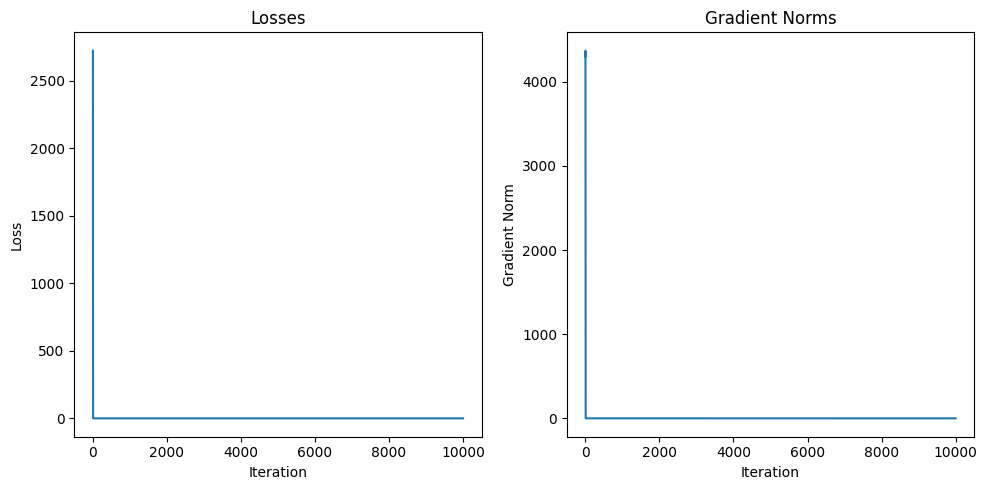

In [10]:
# calculating both
losses = [rosenbrock(point[0], point[1]) for point in path]
gradient_norms = [np.linalg.norm(rosenbrock_gradient(point[0], point[1])) for point in path]

# losses
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Losses')
plt.xlabel('Iteration')
plt.ylabel('Loss')

# gradient norms
plt.subplot(1, 2, 2)
plt.plot(gradient_norms)
plt.title('Gradient Norms')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')

plt.tight_layout()
plt.show()

Now let's visualize the path from gradient descent in both 2 and 3 dimensions: 

C:\Users\anton\AppData\Local\Temp\ipykernel_41220\1087146764.py:30: UserWarning: Log scale: values of z <= 0 have been masked
  contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm()) #, norm=LogNorm()


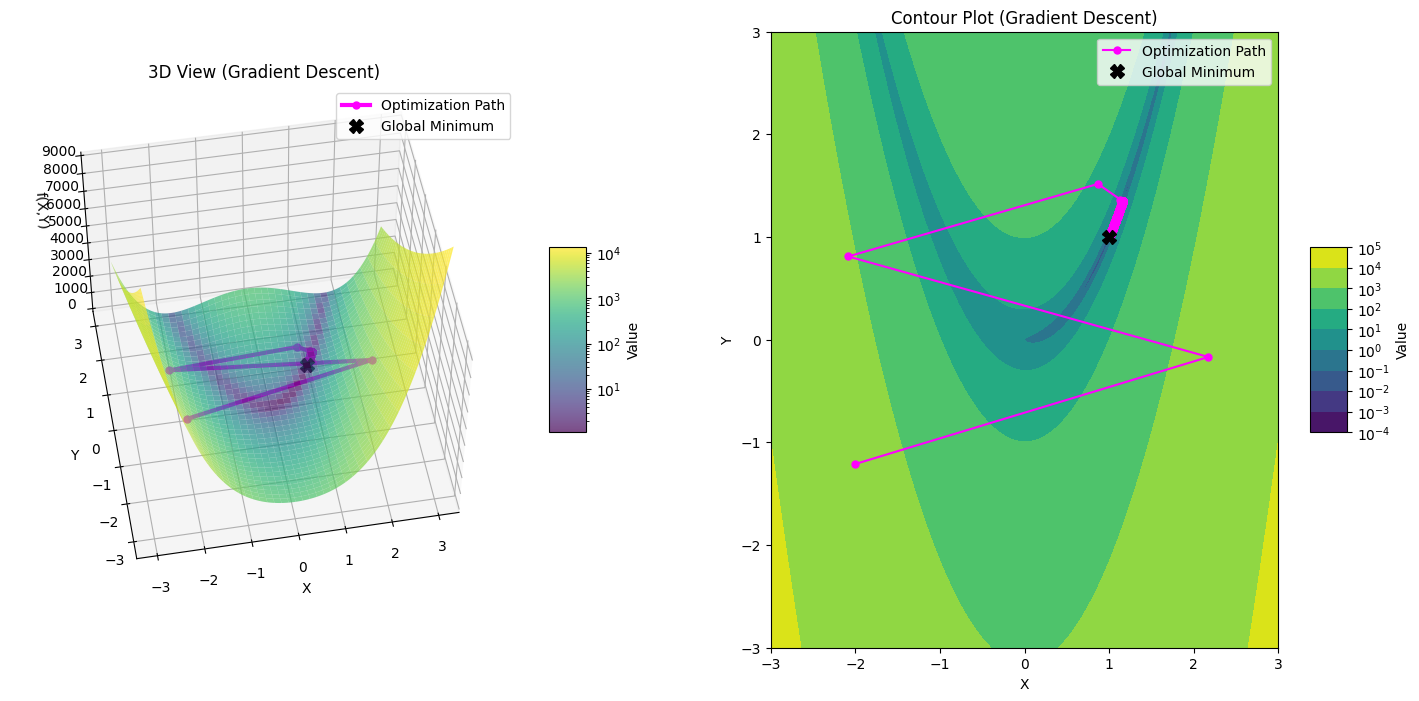

[1.00390426 1.00783935]


In [11]:
# Define a wider range for x and y
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure(figsize=(18, 8))  # Wider figure size

if only2d:

    # Contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm()) #, norm=LogNorm()
    path_contour = ax2.plot(path[:,0], path[:,1], marker='o', color='magenta', linestyle='-', markersize=5, label='Optimization Path')
    min_contour = ax2.plot(1, 1, 'X', markersize=10, label='Global Minimum', color = "black")
    ax2.set_title("Contour Plot (Gradient Descent)")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.legend()

    # Adding a color bar for the contour plot
    color_bar2 = fig.colorbar(contour, ax=ax2, shrink=0.3, aspect=5)
    color_bar2.set_label('Value')

else: 


    # Contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm()) #, norm=LogNorm()
    path_contour = ax2.plot(path[:,0], path[:,1], marker='o', color='magenta', linestyle='-', markersize=5, label='Optimization Path')
    min_contour = ax2.plot(1, 1, 'X', markersize=10, label='Global Minimum', color = "black")
    ax2.set_title("Contour Plot (Gradient Descent)")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.legend()

    # Adding a color bar for the contour plot
    color_bar2 = fig.colorbar(contour, ax=ax2, shrink=0.3, aspect=5)
    color_bar2.set_label('Value')

    # 3D plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, rstride=10, cstride=10, alpha=0.7, cmap='viridis', norm=LogNorm()) # for large starting point use norm=LogNorm()
    path_z = rosenbrock(path[:,0], path[:,1]) 
    path_plot = ax1.plot(path[:,0], path[:,1], path_z, 
                        marker='o', color='magenta', 
                        markersize=5, linewidth = 3,
                        label='Optimization Path')
    global_min = ax1.plot([1], [1], rosenbrock(1, 1), 'X', markersize=10, label='Global Minimum', color = "black")
    ax1.view_init(elev=50, azim=-100)
    ax1.set_title("3D View (Gradient Descent)")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('f(X,Y)')
    ax1.set_zlim(top=9000) 
    ax1.legend()

    # Adding a color bar for the 3D surface
    color_bar = fig.colorbar(surf, ax=ax1, shrink=0.3, aspect=5)
    color_bar.set_label('Value')


plt.show()

print(path[-1])

### Gradient Descent with Finite Difference Approximation (Zeroth Order)

In [12]:
# finite difference gradient approximation
def finite_diff_gradient(x, y, h=1e-15, a=1, b=100):
    df_dx = (rosenbrock(x + h, y, a, b) - rosenbrock(x - h, y, a, b)) / (2 * h)
    df_dy = (rosenbrock(x, y + h, a, b) - rosenbrock(x, y - h, a, b)) / (2 * h)
    return np.array([df_dx, df_dy])

This time we swap it in to our gradient descent algorithm, rather than the exact gradient: 

Converged in 9999 iterations


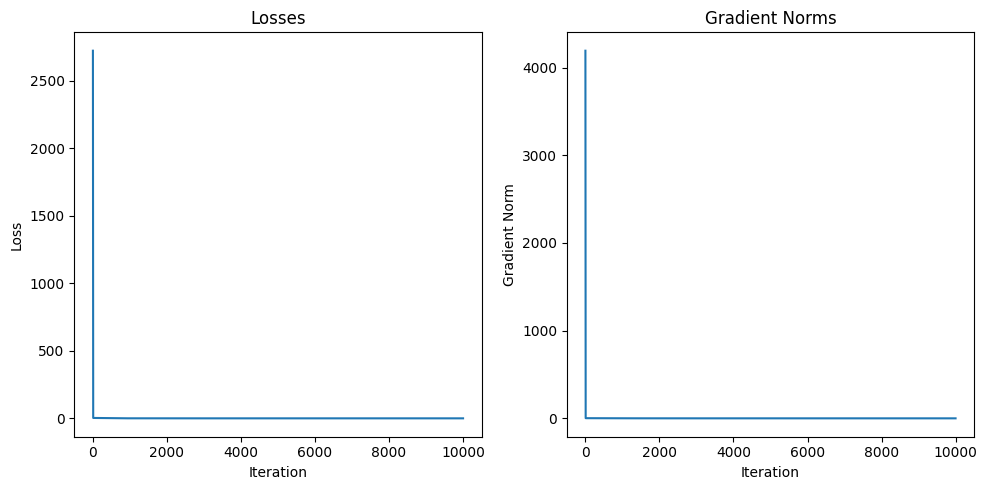

In [13]:
# gradient descent algorithm
# we leave the gradient option as an argument to the function so we can swap it out
def gradient_descent(initial_point, learning_rate, grad_option, max_iter=10000, epsilon=1e-6):
    path = [initial_point]
    x = np.array(initial_point)
    for i in range(max_iter):
        grad = grad_option(x[0], x[1])
        x = x - learning_rate * grad
        path.append(x)
        # if np.linalg.norm(grad) < epsilon:
        #     break
        if np.linalg.norm(rosenbrock_gradient(x[0],x[1])) < epsilon:
            break
    return np.array(path), i

# setting gradient descent parameters
#initial_point = (-2,-1.2)
learning_rate = 0.001
#max_iter = 1000

# Perform gradient descent
path_fd, iterations = gradient_descent(initial_point, 
                                    learning_rate,
                                    grad_option = finite_diff_gradient, 
                                    max_iter = max_iter)

# Print convergence information
print(f"Converged in {iterations} iterations")
# for i, step in enumerate(path_fd):
#     print(f"Step {i+1}: {step}, Loss: {rosenbrock(step[0], step[1])}")

# calculating both
losses = [rosenbrock(point[0], point[1]) for point in path_fd]
gradient_norms = [np.linalg.norm(finite_diff_gradient(point[0], point[1])) for point in path_fd]

# losses
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Losses')
plt.xlabel('Iteration')
plt.ylabel('Loss')

# gradient norms
plt.subplot(1, 2, 2)
plt.plot(gradient_norms)
plt.title('Gradient Norms')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')

plt.tight_layout()
plt.show()

Let's look at the finite difference path in both 2 and 3D: 

C:\Users\anton\AppData\Local\Temp\ipykernel_41220\4143822840.py:51: UserWarning: Log scale: values of z <= 0 have been masked
  contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm()) #, norm=LogNorm()


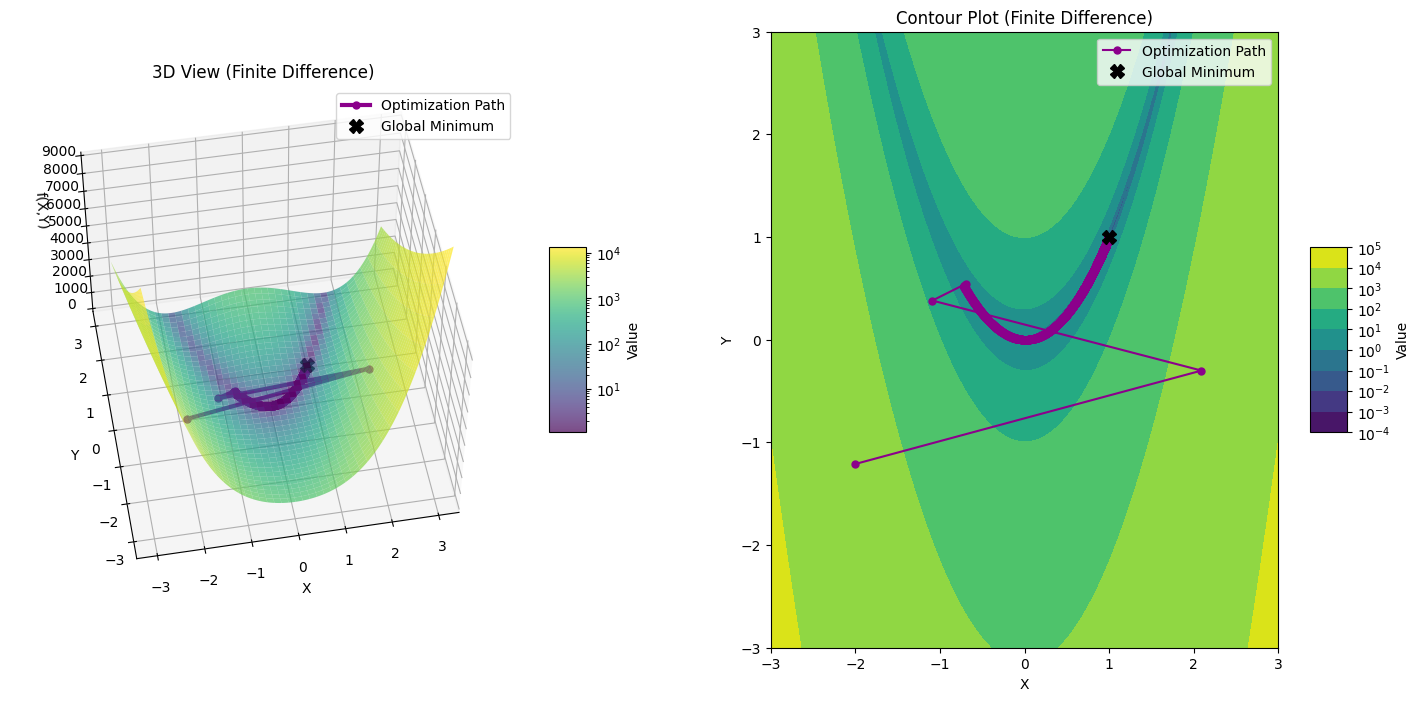

[1.00390426 1.00783935]


In [14]:
# defining range for x and y
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure(figsize=(18, 8))  # Wider figure size


if only2d: 

    # Contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm()) #, norm=LogNorm()
    path_contour = ax2.plot(path_fd[:,0], path_fd[:,1], marker='o', color='darkmagenta', linestyle='-', markersize=5, label='Optimization Path')
    min_contour = ax2.plot(1, 1, 'X', markersize=10, label='Global Minimum', color = "black")
    ax2.set_title("Contour Plot (Finite Difference)")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.legend()

    # Adding a color bar for the contour plot
    color_bar2 = fig.colorbar(contour, ax=ax2, shrink=0.3, aspect=5)
    color_bar2.set_label('Value')

else:

    # 3D plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, rstride=10, cstride=10, alpha=0.7, cmap='viridis', norm=LogNorm()) # for large starting point use norm=LogNorm()
    path_z = rosenbrock(path_fd[:,0], path_fd[:,1]) 
    path_plot = ax1.plot(path_fd[:,0], path_fd[:,1], path_z,
                        marker='o', color='darkmagenta', 
                        markersize=5, linewidth = 3,
                        label='Optimization Path')
    global_min = ax1.plot([1], [1], rosenbrock(1, 1), 'X', markersize=10, label='Global Minimum', color = "black")
    ax1.view_init(elev=50, azim=-100)
    ax1.set_title("3D View (Finite Difference)")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('f(X,Y)')
    ax1.set_zlim(top=9000) 
    ax1.legend()

    # Adding a color bar for the 3D surface
    color_bar = fig.colorbar(surf, ax=ax1, shrink=0.3, aspect=5)
    color_bar.set_label('Value')

    # Contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm()) #, norm=LogNorm()
    path_contour = ax2.plot(path_fd[:,0], path_fd[:,1], marker='o', color='darkmagenta', linestyle='-', markersize=5, label='Optimization Path')
    min_contour = ax2.plot(1, 1, 'X', markersize=10, label='Global Minimum', color = "black")
    ax2.set_title("Contour Plot (Finite Difference)")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.legend()

    # Adding a color bar for the contour plot
    color_bar2 = fig.colorbar(contour, ax=ax2, shrink=0.3, aspect=5)
    color_bar2.set_label('Value')

plt.show()

print(path[-1])

### Evolving Random Search (Direct DFO Method)

Completed 10000 iterations


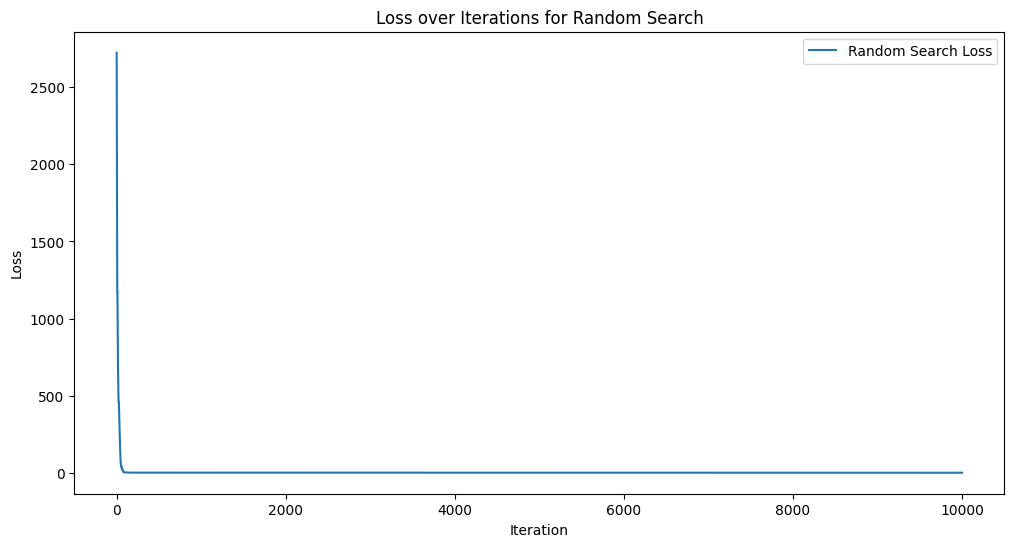

In [15]:
# iterative random search
def random_search(initial_point, max_iter=10000, search_radius=0.1, decay_rate=0.995):
    path = [initial_point]
    losses = [rosenbrock(initial_point[0], initial_point[1])]
    x = np.array(initial_point)
    current_loss = losses[0]

    for i in range(max_iter):
        new_x = x + np.random.uniform(-search_radius, search_radius, 2)
        new_loss = rosenbrock(new_x[0], new_x[1])
        if new_loss < current_loss:
            x = new_x
            current_loss = new_loss
        path.append(x)
        losses.append(current_loss)
        search_radius *= decay_rate  # Reduce search radius over time for finer search
        
        if np.linalg.norm(rosenbrock_gradient(x[0],x[1])) < epsilon:
            break
    return np.array(path), losses, i

# setting params
#initial_point = (-2,-1.2)
#max_iter = 300000
search_radius = 0.1  # Initial search radius
decay_rate = 0.995  # Decay rate of the search radius
epsilon = 1e-6
# Perform random search
path, rs_losses, iterations = random_search(initial_point, max_iter, search_radius, decay_rate)

# Print convergence information
print(f"Completed {iterations + 1} iterations")
# for i, step in enumerate(path):
#     print(f"Step {i+1}: {step}, Loss: {rosenbrock(step[0], step[1])}")

# Plotting the loss over iterations for Random Search
plt.figure(figsize=(12, 6))
plt.plot(rs_losses, label='Random Search Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over Iterations for Random Search')
plt.legend()
plt.show()

Looking at random search path in both 2 and 3 dimensions. This one looks different from the others (more drunk):

C:\Users\anton\AppData\Local\Temp\ipykernel_41220\3649985325.py:50: UserWarning: Log scale: values of z <= 0 have been masked
  contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm()) #, norm=LogNorm()


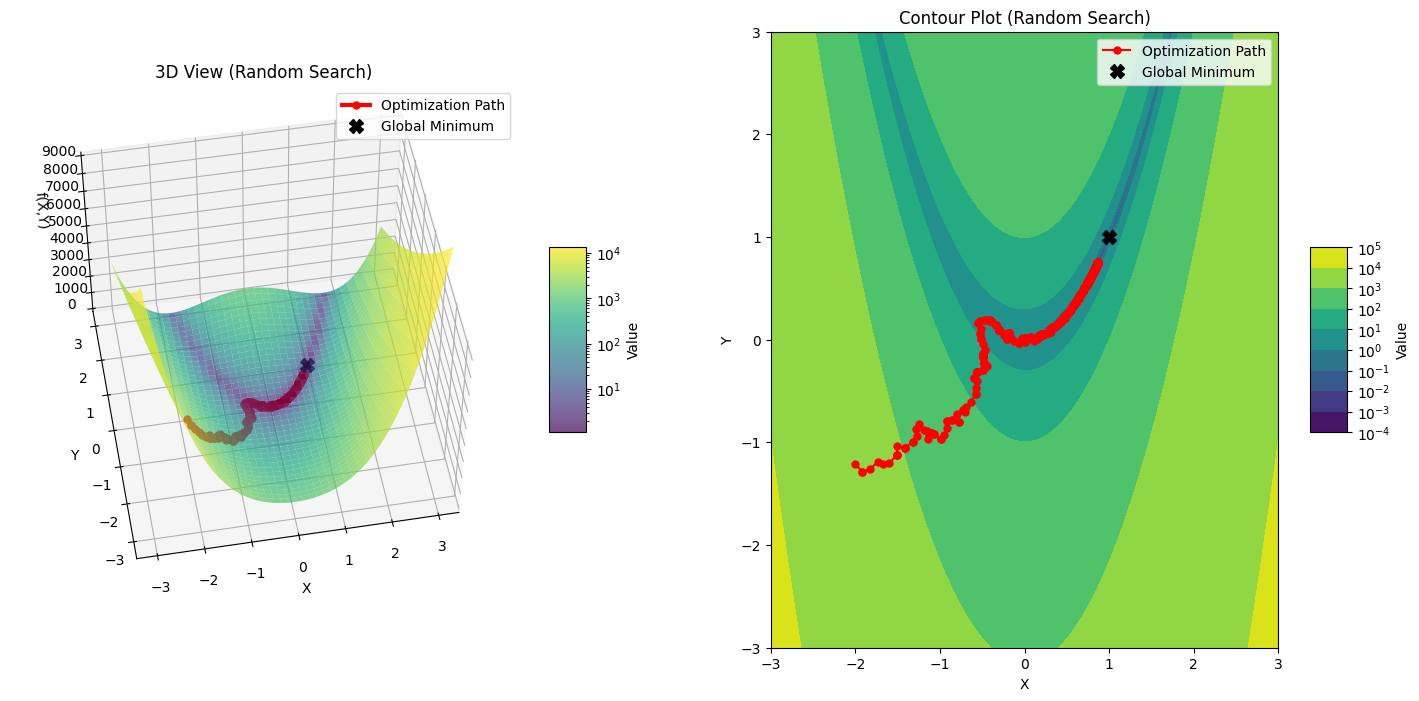

[0.87251399 0.76073819]


In [16]:
# Define a wider range for x and y
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure(figsize=(18, 8))  # Wider figure size


if only2d:
    
        # Contour plot
        ax2 = fig.add_subplot(122)
        contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm()) #, norm=LogNorm()
        path_contour = ax2.plot(path[:,0], path[:,1], marker='o', color='red', linestyle='-', markersize=5, label='Optimization Path')
        min_contour = ax2.plot(1, 1, 'X', markersize=10, label='Global Minimum', color = "black")
        ax2.set_title("Contour Plot (Random Search)")
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.legend()
    
        # Adding a color bar for the contour plot
        color_bar2 = fig.colorbar(contour, ax=ax2, shrink=0.3, aspect=5)
        color_bar2.set_label('Value')

else:
    # 3D plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, rstride=10, cstride=10, alpha=0.7, cmap='viridis', norm=LogNorm()) # for large starting point use norm=LogNorm()
    path_z = rosenbrock(path[:,0], path[:,1]) 
    path_plot = ax1.plot(path[:,0], path[:,1], path_z, 
                        marker='o', color='red', 
                        markersize=5, linewidth = 3,
                        label='Optimization Path')
    global_min = ax1.plot([1], [1], rosenbrock(1, 1), 'X', markersize=10, label='Global Minimum', color = "black")
    ax1.view_init(elev=50, azim=-100)
    ax1.set_title("3D View (Random Search)")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('f(X,Y)')
    ax1.set_zlim(top=9000) 
    ax1.legend()

    # Adding a color bar for the 3D surface
    color_bar = fig.colorbar(surf, ax=ax1, shrink=0.3, aspect=5)
    color_bar.set_label('Value')

    # Contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm()) #, norm=LogNorm()
    path_contour = ax2.plot(path[:,0], path[:,1], marker='o', color='red', linestyle='-', markersize=5, label='Optimization Path')
    min_contour = ax2.plot(1, 1, 'X', markersize=10, label='Global Minimum', color = "black")
    ax2.set_title("Contour Plot (Random Search)")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.legend()

    # Adding a color bar for the contour plot
    color_bar2 = fig.colorbar(contour, ax=ax2, shrink=0.3, aspect=5)
    color_bar2.set_label('Value')

plt.show()

print(path[-1])

### Stochastic Three Point (STP) (Zeroth Order)

This is typically a direct search DFO method, but we adapt it to create a gradient approximation, which makes it a ZO method:

In [17]:
# stochastic three-point (STP) 
def stp_optim(initial_point, alpha, max_iter=10000, distribution='normal'):
    path = [initial_point]
    x = np.array(initial_point)
    dim = len(x)
    for k in range(max_iter):
        if distribution == 'normal':
            s_k = np.random.randn(dim)  # Normal distribution
        else:
            raise ValueError("Unsupported distribution type")

        h = 1e-15
        x_plus = x + h * s_k
        x_minus = x - h * s_k
        
        # x_plus = x + alpha * s_k
        # x_minus = x - alpha * s_k
        
        f_plus = rosenbrock(x_plus[0], x_plus[1])
        f_minus = rosenbrock(x_minus[0], x_minus[1])

        g_hat = (f_plus - f_minus) / (2 * h) * s_k
        # g_hat = (f_plus - f_minus) / (2 * alpha) * s_k


        x = x - alpha * g_hat

        # f_current = rosenbrock(x[0], x[1])
        
        # # Choose the next point based on the smallest function value
        # if f_plus <= f_minus and f_plus <= f_current:
        #     x_next = x_plus
        # elif f_minus <= f_plus and f_minus <= f_current:
        #     x_next = x_minus
        # else:
        #     x_next = x  # No movement if current is better than both
        
        # x = x_next
        path.append(x)
        if np.linalg.norm(rosenbrock_gradient(x[0],x[1])) < epsilon:
            break
        # alpha = alpha * 0.999
        # Termination condition can be added here if needed (e.g., small changes in x or function value)
    
    return np.array(path), k

# Parameters for the optimization
#initial_point = (-2,-1.2)
alpha = 0.0001  # Step size
epsilon = 1e-6  # Convergence criterion
max_iter = 80000
distribution = 'normal'  # Distribution for random vector generation

# Perform optimization
path, iterations = stp_optim(initial_point, alpha, max_iter, distribution)
path_stp = path
# Print convergence information
print(f"Converged in {iterations} iterations")
# for i, step in enumerate(path):
#     print(f"Step {i+1}: {step}, Loss: {rosenbrock(step[0], step[1])}")

Converged in 79999 iterations


Looking in 2 and 3D:

C:\Users\anton\AppData\Local\Temp\ipykernel_41220\57708091.py:16: UserWarning: Log scale: values of z <= 0 have been masked
  contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm()) #, norm=LogNorm()


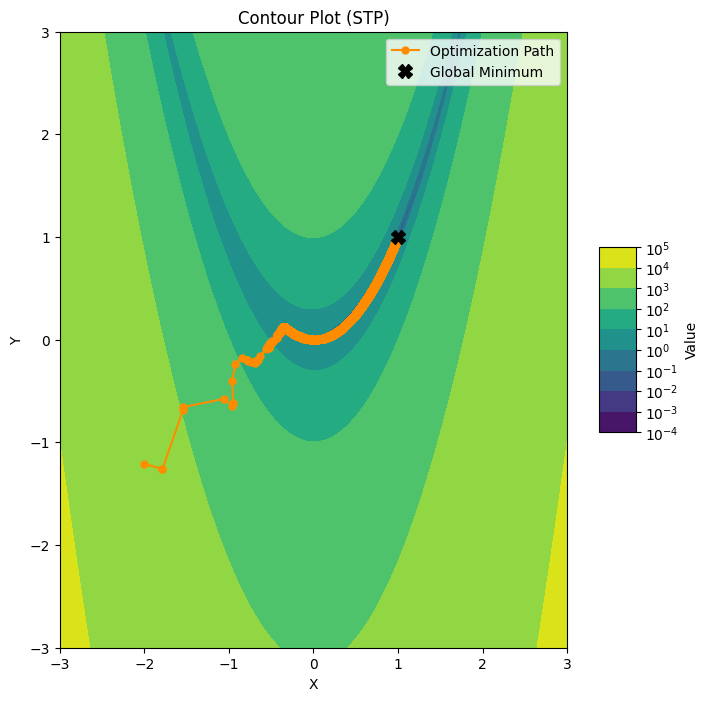

[0.98661541 0.9733629 ]


In [18]:
# Define a wider range for x and y
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

only2d = True

fig = plt.figure(figsize=(18, 8))  # Wider figure size


if only2d:
    
        # Contour plot
        ax2 = fig.add_subplot(122)
        contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm()) #, norm=LogNorm()
        path_contour = ax2.plot(path[:,0], path[:,1], marker='o', color='darkorange', linestyle='-', markersize=5, label='Optimization Path')
        min_contour = ax2.plot(1, 1, 'X', markersize=10, label='Global Minimum', color = "black")
        ax2.set_title("Contour Plot (STP)")
        ax2.set_xlabel('X')
        ax2.set_ylabel('Y')
        ax2.legend()
    
        # Adding a color bar for the contour plot
        color_bar2 = fig.colorbar(contour, ax=ax2, shrink=0.3, aspect=5)
        color_bar2.set_label('Value')

else:

    # 3D plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, rstride=10, cstride=10, alpha=0.7, cmap='viridis', norm=LogNorm()) # for large starting point use norm=LogNorm()
    path_z = rosenbrock(path[:,0], path[:,1]) 
    path_plot = ax1.plot(path[:,0], path[:,1], path_z, 
                        marker='o', color= 'darkorange', 
                        markersize=5, linewidth = 3,
                        label='Optimization Path')
    global_min = ax1.plot([1], [1], rosenbrock(1, 1), 'X', markersize=10, label='Global Minimum', color = "black")
    ax1.view_init(elev=50, azim=-100)
    ax1.set_title("3D View (STP)")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('f(X,Y)')
    ax1.set_zlim(top=9000) 
    ax1.legend()

    # Adding a color bar for the 3D surface
    color_bar = fig.colorbar(surf, ax=ax1, shrink=0.3, aspect=5)
    color_bar.set_label('Value')

    # Contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm()) #, norm=LogNorm()
    path_contour = ax2.plot(path[:,0], path[:,1], marker='o', color= 'darkorange', linestyle='-', markersize=5, label='Optimization Path')
    min_contour = ax2.plot(1, 1, 'X', markersize=10, label='Global Minimum', color = "black")
    ax2.set_title("Contour Plot (STP))")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.legend()

    # Adding a color bar for the contour plot
    color_bar2 = fig.colorbar(contour, ax=ax2, shrink=0.3, aspect=5)
    color_bar2.set_label('Value')

plt.show()

print(path[-1])

Comparing accuracy and convergence rates for finite difference and Stochastic Three Point methods

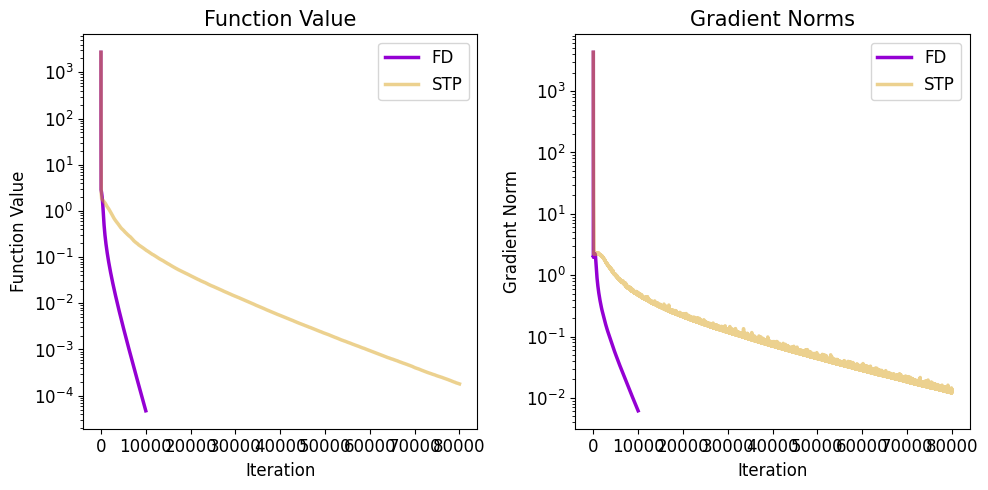

In [19]:
# calculating both
fxn_vals_fd = [rosenbrock(point[0], point[1]) for point in path_fd]
gradient_norms_fd = [np.linalg.norm(rosenbrock_gradient(point[0], point[1])) for point in path_fd]

fxn_vals_stp = [rosenbrock(point[0], point[1]) for point in path_stp]
gradient_norms_stp = [np.linalg.norm(rosenbrock_gradient(point[0], point[1])) for point in path_stp]

# losses
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fxn_vals_fd, color='darkviolet', linewidth=2.5, label='FD')
plt.plot(fxn_vals_stp, color='goldenrod', linewidth=2.5, alpha=0.5, label='STP')
plt.title('Function Value', fontsize=15)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Function Value', fontsize=12)
plt.yscale('log')
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# gradient norms
plt.subplot(1, 2, 2)
plt.plot(gradient_norms_fd, color='darkviolet', linewidth=2.5, label='FD')
plt.plot(gradient_norms_stp, color='goldenrod', linewidth=2.5, alpha=0.5, label='STP')
plt.title('Gradient Norms', fontsize=15)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Gradient Norm', fontsize=12)
plt.yscale('log')
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### Efficiency comparison of Finite Difference in GD and STP methods

In [20]:
alpha = 0.001  # Step size
iter_counts = []
for a in range(10):
    _, iterations = stp_optim(initial_point, alpha, max_iter, distribution)
    iter_counts.append(iterations)

alpha = 0.001 * 0.5  # Step size

iter_counts1 = []
for a in range(10):
    _, iterations = stp_optim(initial_point, alpha, max_iter, distribution)
    iter_counts1.append(iterations)


(array([0., 1., 2., 3., 4., 5., 6.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6')])

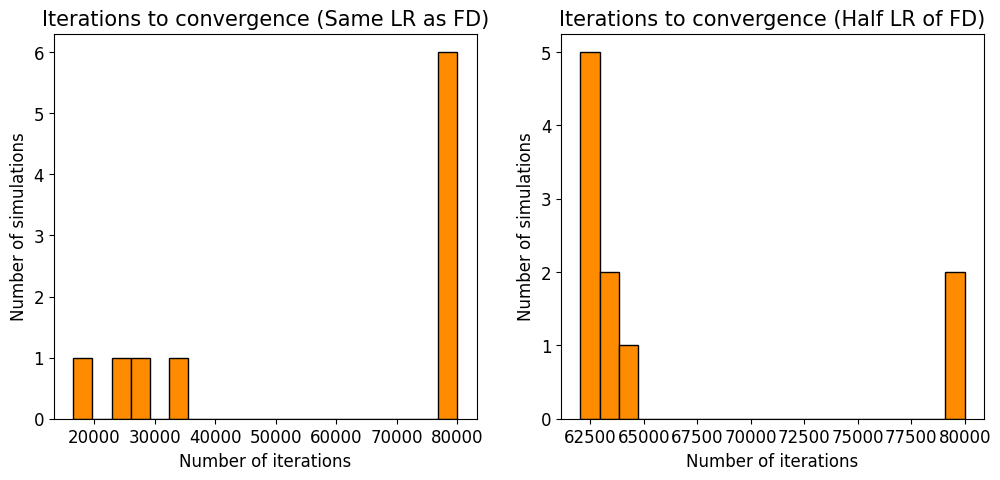

In [21]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(iter_counts, bins=20, color='darkorange', edgecolor='black')
plt.title('Iterations to convergence (Same LR as FD)', fontsize=15)
plt.xlabel('Number of iterations', fontsize=12)
plt.ylabel('Number of simulations', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1, 2, 2)
plt.hist(iter_counts1, bins=20, color='darkorange', edgecolor='black')
plt.title('Iterations to convergence (Half LR of FD)', fontsize=15)
plt.xlabel('Number of iterations', fontsize=12)
plt.ylabel('Number of simulations', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

## signOPT (Zeroth Order)

In [22]:
def signOPT(initial_point, alpha, max_iter=10000, epsilon=0.1, Q=50, distribution='gaussian'):
    path = [initial_point]
    theta = np.array(initial_point)
    
    for k in range(max_iter):
        g_hat = np.zeros_like(theta)

        # Sample random directions
        if distribution == 'gaussian':
            U = np.random.randn(Q, len(theta))
        elif distribution == 'uniform':
            U = np.random.uniform(-1, 1, (Q, len(theta)))
        else:
            raise ValueError("Unsupported distribution type")

        # Normalize each direction
        U = U / np.linalg.norm(U, axis=1, keepdims=True)

        # Estimate the gradient
        for u in U:
            theta_plus = theta + epsilon * u
            theta_minus = theta - epsilon * u

            f_plus = rosenbrock(theta_plus[0], theta_plus[1])
            f_minus = rosenbrock(theta_minus[0], theta_minus[1])

            g_hat += np.sign(f_plus - f_minus) * u
        
        g_hat /= Q

        # Update theta
        theta = theta - alpha * g_hat
        path.append(theta)
    
    return np.array(path), k


# Parameters for the optimization
alpha = 0.01  # Step size
#max_iter = 1000  # Maximum number of iterations
delta = 0.01  # Perturbation size for finite difference gradient approximation
Q = 1

# Perform the optimization
path, iterations = signOPT(initial_point, alpha, max_iter, delta, Q)

# Print convergence information
print(f"Converged in {iterations} iterations")
for i, step in enumerate(path):
    if i % 1000 == 0:  # Print every 1000 steps to avoid too much output
        print(f"Step {i+1}: {step}, Loss: {rosenbrock(step[0], step[1])}")

Converged in 79999 iterations
Step 1: [-2.   -1.21], Loss: 2723.41
Step 1001: [0.85232412 0.74368812], Loss: 0.05150138944098387
Step 2001: [0.94958337 0.91369335], Loss: 0.016905314346424002
Step 3001: [1.01749885 1.02986363], Loss: 0.0032658723303656215
Step 4001: [1.01536474 1.0453912 ], Loss: 0.02104599562338942
Step 5001: [1.00815634 1.01603946], Loss: 7.806868628961429e-05
Step 6001: [0.99884788 1.00265137], Loss: 0.002455827037481387
Step 7001: [0.98367904 0.97668961], Loss: 0.00848409000629652
Step 8001: [0.9765577  0.96116943], Loss: 0.006181294474969802
Step 9001: [1.0185618  1.04283817], Loss: 0.0032282534763207202
Step 10001: [0.95288235 0.89134594], Loss: 0.029905133577409898
Step 11001: [1.07360375 1.13642334], Loss: 0.03166695780648285
Step 12001: [1.06018309 1.11421709], Loss: 0.013169451623055163
Step 13001: [1.00293889 1.02029622], Loss: 0.020772896702556783
Step 14001: [1.02569507 1.04856095], Loss: 0.0018778526183110397
Step 15001: [1.03100869 1.0528372 ], Loss: 0.0

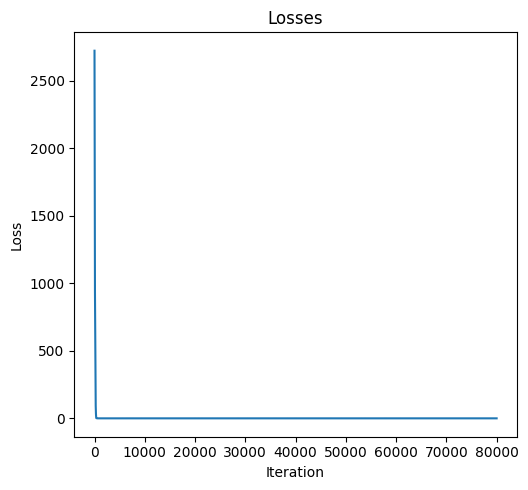

In [23]:
# calculating both
losses = [rosenbrock(point[0], point[1]) for point in path]
gradient_norms = [np.linalg.norm(rosenbrock_gradient(point[0], point[1])) for point in path]

# losses
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Losses')
plt.xlabel('Iteration')
plt.ylabel('Loss')

#IF APPLICABLE 
# gradient norms
# plt.subplot(1, 2, 2)
# plt.plot(gradient_norms)
# plt.title('Gradient Norms')
# plt.xlabel('Iteration')
# plt.ylabel('Gradient Norm')

plt.tight_layout()
plt.show()

C:\Users\anton\AppData\Local\Temp\ipykernel_41220\42478044.py:13: UserWarning: Log scale: values of z <= 0 have been masked
  contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm())


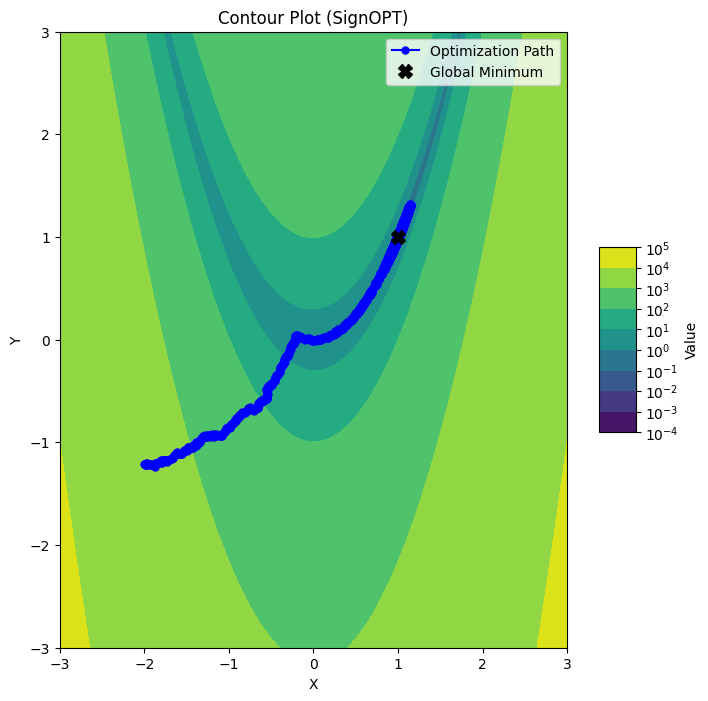

In [26]:
# Define a wider range for x and y
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure(figsize=(18, 8))  # Wider figure size

if only2d:

    # Contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm()) 


    path_contour = ax2.plot(path[:,0], path[:,1], marker='o', color='blue', linestyle='-', markersize=5, label='Optimization Path') 

    min_contour = ax2.plot(1, 1, 'X', markersize=10, label='Global Minimum', color = "black")

    ax2.set_title("Contour Plot (SignOPT)")

    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.legend()

    # Adding a color bar for the contour plot
    color_bar2 = fig.colorbar(contour, ax=ax2, shrink=0.3, aspect=5)
    color_bar2.set_label('Value')

else: 


    # Contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, 50, cmap='viridis', norm=LogNorm()) 

    path_contour = ax2.plot(path[:,0], path[:,1], marker='o', color='blue', linestyle='-', markersize=5, label='Optimization Path') 

    min_contour = ax2.plot(1, 1, 'X', markersize=10, label='Global Minimum', color = "black")

    ax2.set_title("Contour Plot (SignOPT)")

    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.legend()

    # Adding a color bar for the contour plot
    color_bar2 = fig.colorbar(contour, ax=ax2, shrink=0.3, aspect=5)
    color_bar2.set_label('Value')

    # 3D plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, rstride=10, cstride=10, alpha=0.7, cmap='viridis', norm=LogNorm()) 
    path_z = rosenbrock(path[:,0], path[:,1]) 

    path_plot = ax1.plot(path[:,0], path[:,1], path_z, 
                        marker='o', color='blue',   #
                        markersize=5, linewidth = 3,
                        label='Optimization Path')
    global_min = ax1.plot([1], [1], rosenbrock(1, 1), 'X', markersize=10, label='Global Minimum', color = "black")
    ax1.view_init(elev=50, azim=-100)
 
    ax1.set_title("3D View (SignOPT)")

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Loss')
    ax1.set_zlim(top=9000) 
    ax1.legend()

    # Adding a color bar for the 3D surface
    color_bar = fig.colorbar(surf, ax=ax1, shrink=0.3, aspect=5)
    color_bar.set_label('Value')


plt.show()

In [25]:
import nbformat

with open('final_project_AS.ipynb', 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

total_lines = sum(len(cell['source'].splitlines()) for cell in nb['cells'] if cell['cell_type'] == 'code')
print(f"Total lines of code: {total_lines}")


Total lines of code: 774
